### data shape

In [3]:
import nibabel as nib

# 指定影像路徑（以下為 sub-01 的例子）
img_path = "output/roi_ts/rest/sub-01_task-rest_concat.nii.gz"

# 讀取影像
img = nib.load(img_path)

# 取得影像形狀（x, y, z, time）
print("影像維度:", img.shape)

# 取得時間點數
n_timepoints = img.shape[-1]
print("時間點數 =", n_timepoints)

影像維度: (91, 109, 91, 2536)
時間點數 = 2536


### RSN & ROI  time series Visualization

已儲存：output/rsn_ts_zscore/sub-01_rsn_ts_plot.png


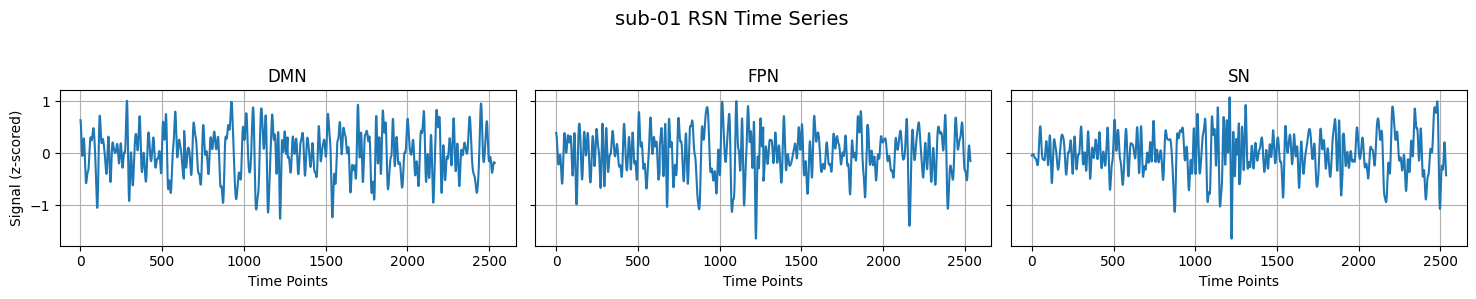

已儲存：output/rsn_ts_zscore/sub-02_rsn_ts_plot.png


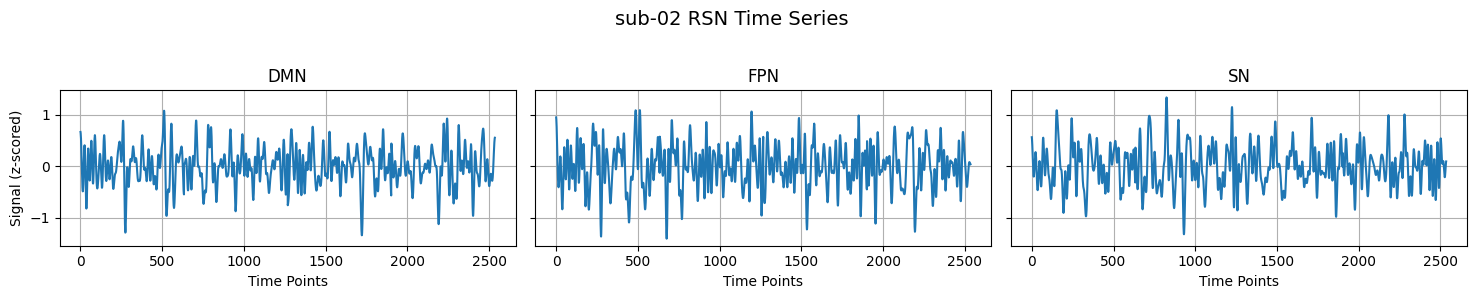

已儲存：output/rsn_ts_zscore/sub-03_rsn_ts_plot.png


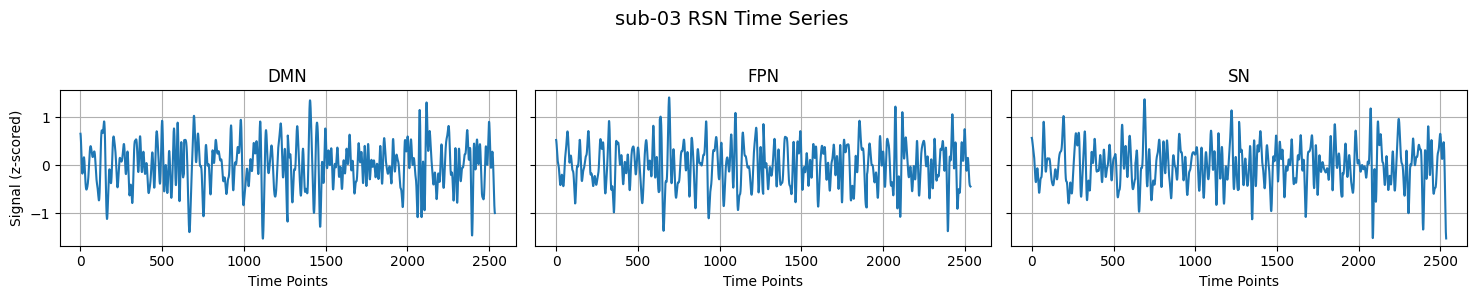

已儲存：output/rsn_ts_zscore/sub-04_rsn_ts_plot.png


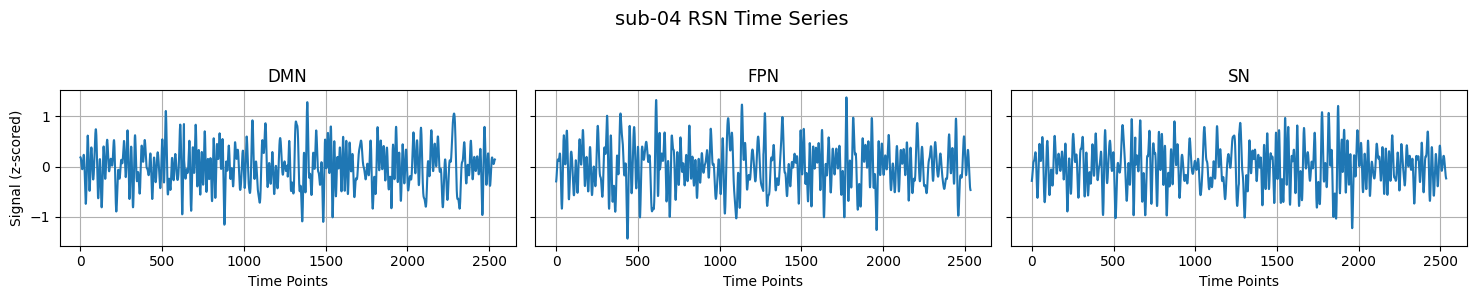

已儲存：output/rsn_ts_zscore/sub-05_rsn_ts_plot.png


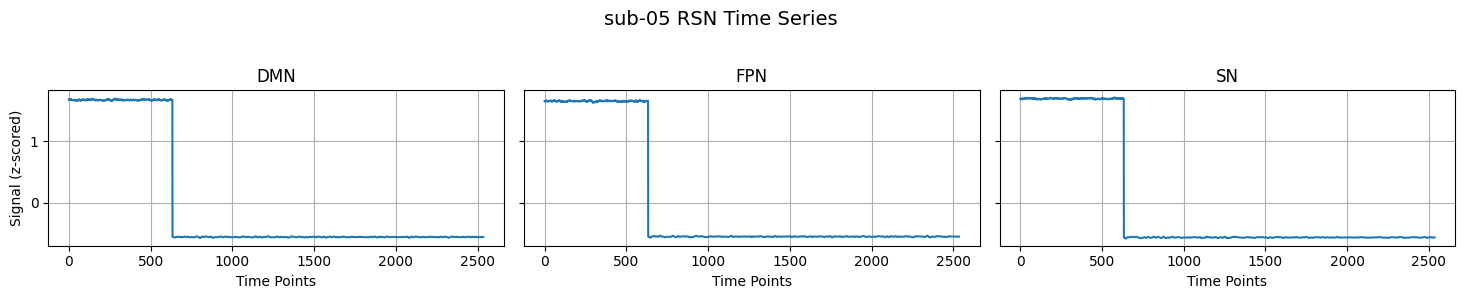

已儲存：output/rsn_ts_zscore/sub-06_rsn_ts_plot.png


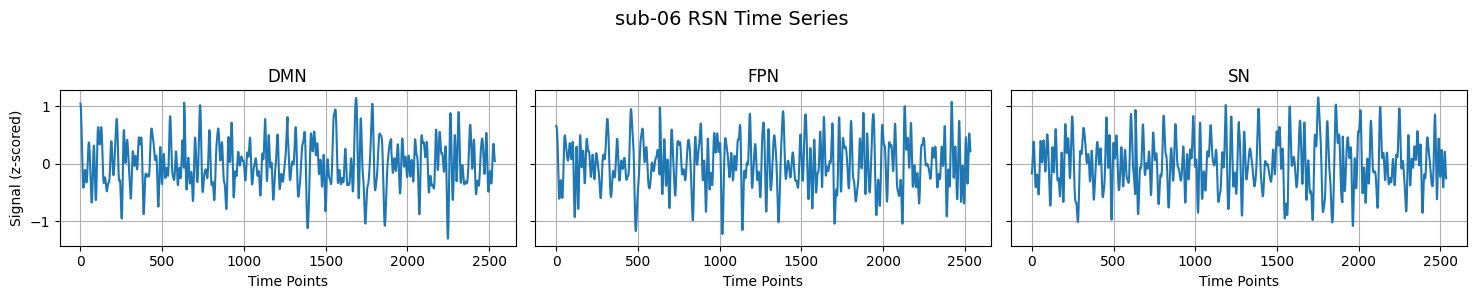

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 設定 RSN 路徑與標籤
rsn_ts_dir = "output/rsn_ts_zscore"
rsn_labels = ["DMN", "FPN", "SN"]
subjects = [f"sub-{i:02d}" for i in range(1, 7)]

# 繪圖與儲存
for sub in subjects:
    fig, axes = plt.subplots(1, len(rsn_labels), figsize=(15, 3), sharey=True)
    fig.suptitle(f"{sub} RSN Time Series", fontsize=14)

    for i, rsn in enumerate(rsn_labels):
        filename = f"{sub}_{rsn}_zscore_ts.csv"
        path = os.path.join(rsn_ts_dir, filename)
        if os.path.exists(path):
            ts = pd.read_csv(path, header=None).values.squeeze()
            axes[i].plot(ts)
            axes[i].set_title(rsn)
            axes[i].set_xlabel("Time Points")
            if i == 0:
                axes[i].set_ylabel("Signal (z-scored)")
            axes[i].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # 儲存圖檔
    save_path = os.path.join(rsn_ts_dir, f"{sub}_rsn_ts_plot.png")
    plt.savefig(save_path)
    print(f"已儲存：{save_path}")

    # 顯示圖
    plt.show()

已儲存：output/roi_ts_zscore_nan/sub-01_roi_ts_plot.png
已儲存：output/roi_ts_zscore_nan/sub-02_roi_ts_plot.png
已儲存：output/roi_ts_zscore_nan/sub-03_roi_ts_plot.png
已儲存：output/roi_ts_zscore_nan/sub-04_roi_ts_plot.png
已儲存：output/roi_ts_zscore_nan/sub-05_roi_ts_plot.png
已儲存：output/roi_ts_zscore_nan/sub-06_roi_ts_plot.png


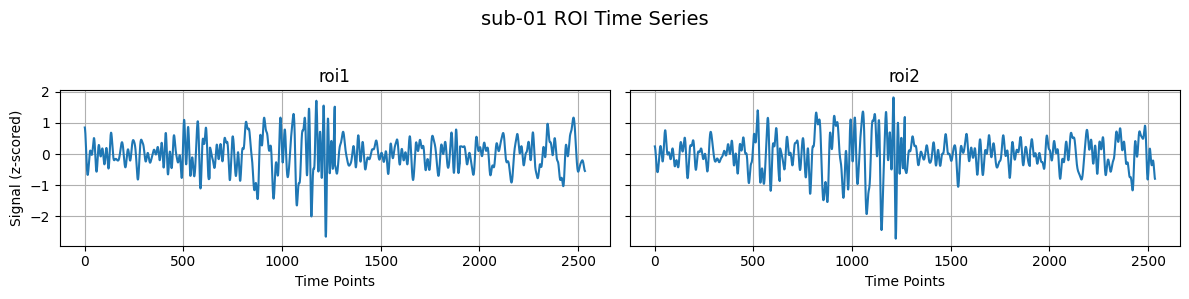

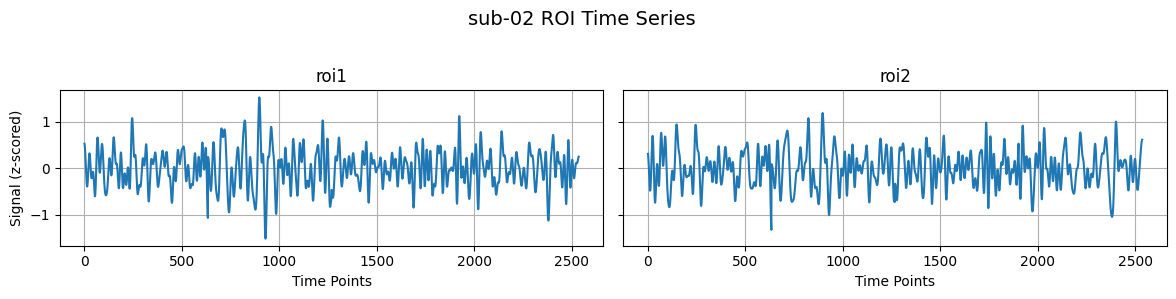

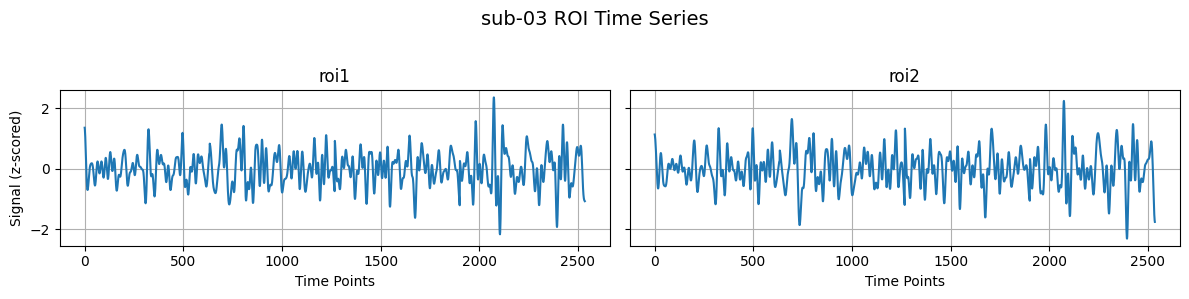

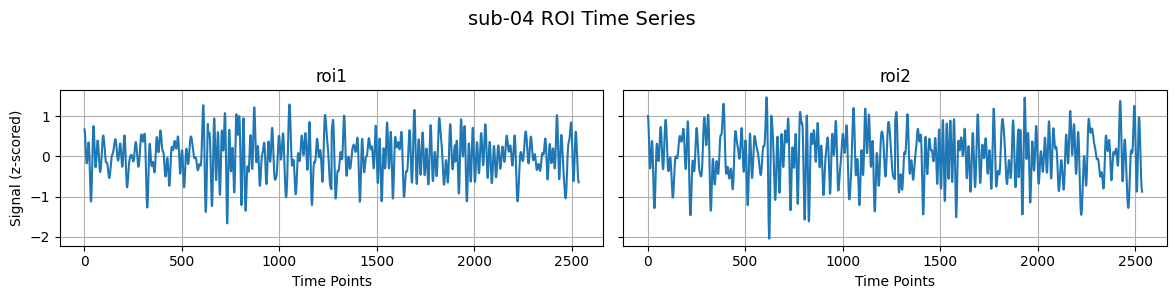

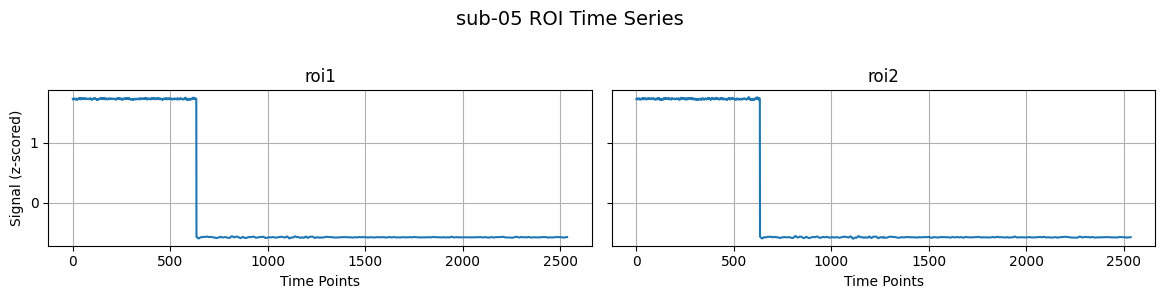

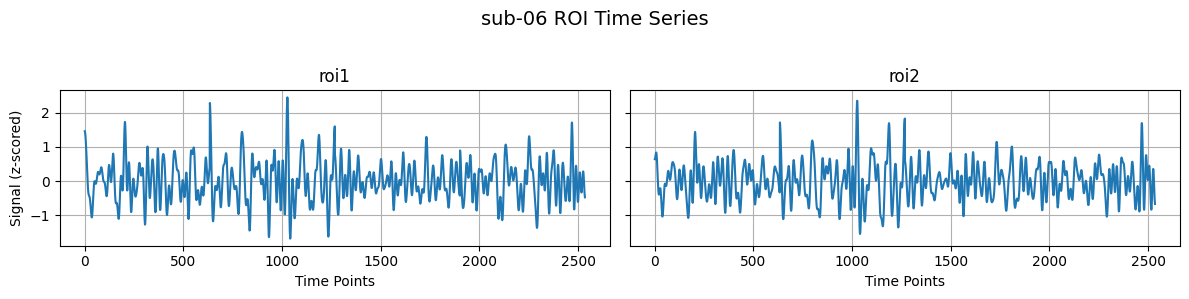

In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 設定 ROI 路徑與標籤
roi_ts_dir = "output/roi_ts_zscore_nan"
roi_labels = ["roi1", "roi2"]
subjects = [f"sub-{i:02d}" for i in range(1, 7)]

# 繪圖與儲存
for sub in subjects:
    fig, axes = plt.subplots(1, len(roi_labels), figsize=(12, 3), sharey=True)
    fig.suptitle(f"{sub} ROI Time Series", fontsize=14)

    for i, roi in enumerate(roi_labels):
        filename = f"{sub}_{roi}_zscore_ts.csv"
        path = os.path.join(roi_ts_dir, filename)
        if os.path.exists(path):
            ts = pd.read_csv(path, header=None).values.squeeze()
            axes[i].plot(ts)
            axes[i].set_title(roi)
            axes[i].set_xlabel("Time Points")
            if i == 0:
                axes[i].set_ylabel("Signal (z-scored)")
            axes[i].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # 預留空間給 suptitle

    # 儲存圖檔
    save_path = os.path.join(roi_ts_dir, f"{sub}_roi_ts_plot.png")
    plt.savefig(save_path)
    print(f"已儲存：{save_path}")

### sub-05 inspection

Run-1 標準差：0.1065
Run-2 標準差：0.6559
Run-3 標準差：0.4212
Run-4 標準差：0.4570


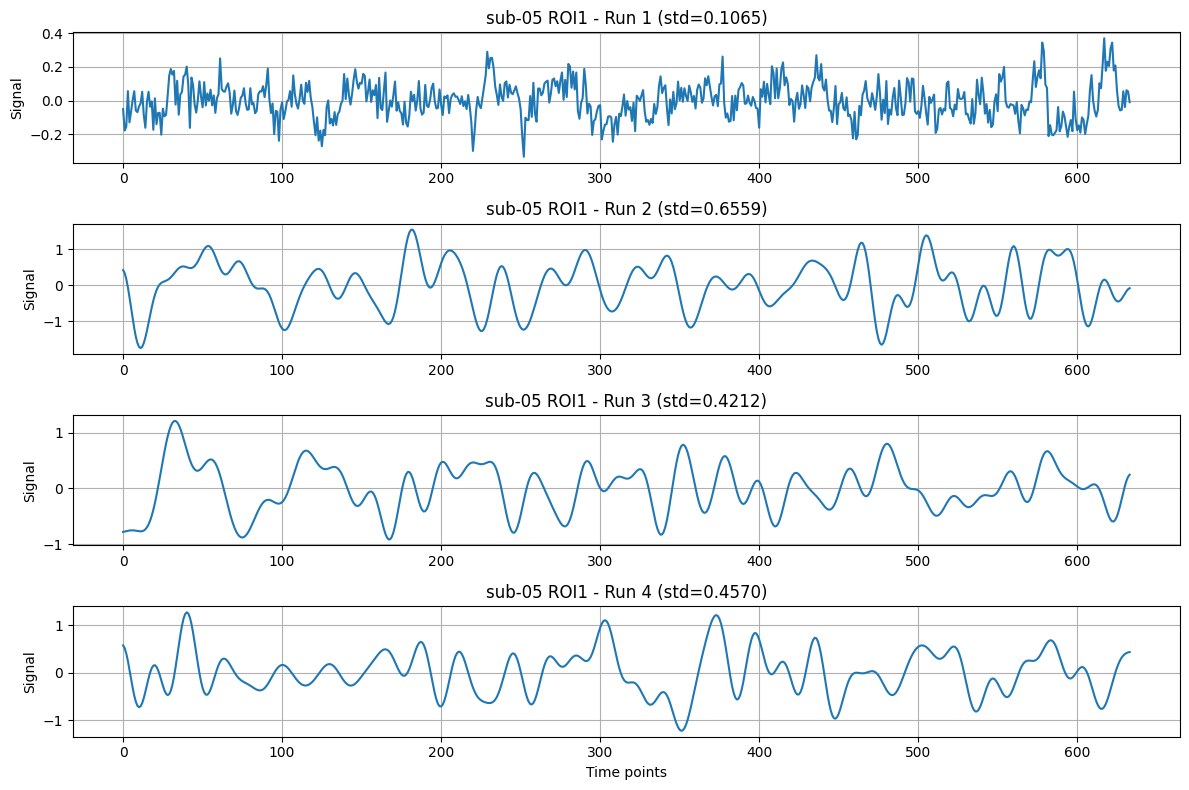

In [9]:
### check sub-05 roi1

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
from nilearn.image import load_img, math_img

# ROI 路徑與受試者設定
roi_path = "output/roi_masks/group_roi_1.nii.gz"
roi_img = load_img(roi_path)
roi_bin = math_img("img > 0", img=roi_img)

sub = "sub-05"
runs = range(1, 5)

# 建立圖形視窗
plt.figure(figsize=(12, 8))

for i, run in enumerate(runs, start=1):
    img_path = f"raw_data/ds004078/derivatives/preprocessed_data/{sub}/MNI/{sub}_task-rest_run-{run}_bold.nii.gz"
    
    if os.path.exists(img_path):
        masker = NiftiMasker(mask_img=roi_bin, standardize=True)
        ts = masker.fit_transform(img_path).mean(axis=1)
        std = ts.std()
        print(f"Run-{run} 標準差：{std:.4f}")
        
        # 畫圖
        plt.subplot(4, 1, i)
        plt.plot(ts)
        plt.title(f"{sub} ROI1 - Run {run} (std={std:.4f})")
        plt.ylabel("Signal")
        plt.grid(True)
    else:
        print(f"找不到檔案：{img_path}")

plt.xlabel("Time points")
plt.tight_layout()
plt.show()

Run-1 標準差：0.1134
Run-2 標準差：0.6401
Run-3 標準差：0.4633
Run-4 標準差：0.4550


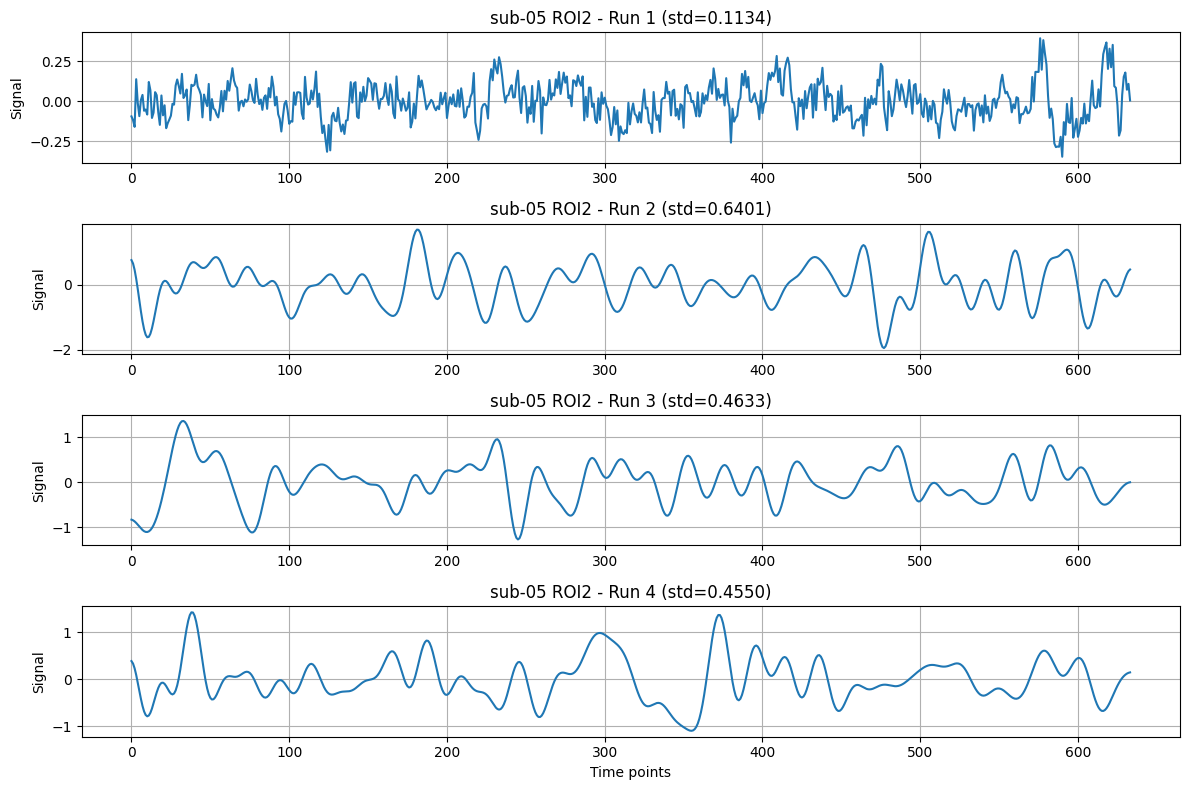

In [11]:
### check sub-05 roi2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
from nilearn.image import load_img, math_img

# ROI 路徑與受試者設定
roi_path = "output/roi_masks/group_roi_2.nii.gz"
roi_img = load_img(roi_path)
roi_bin = math_img("img > 0", img=roi_img)

sub = "sub-05"
runs = range(1, 5)

# 建立圖形視窗
plt.figure(figsize=(12, 8))

for i, run in enumerate(runs, start=1):
    img_path = f"raw_data/ds004078/derivatives/preprocessed_data/{sub}/MNI/{sub}_task-rest_run-{run}_bold.nii.gz"
    
    if os.path.exists(img_path):
        masker = NiftiMasker(mask_img=roi_bin, standardize=True)
        ts = masker.fit_transform(img_path).mean(axis=1)
        std = ts.std()
        print(f"Run-{run} 標準差：{std:.4f}")
        
        # 畫圖
        plt.subplot(4, 1, i)
        plt.plot(ts)
        plt.title(f"{sub} ROI2 - Run {run} (std={std:.4f})")
        plt.ylabel("Signal")
        plt.grid(True)
    else:
        print(f"找不到檔案：{img_path}")

plt.xlabel("Time points")
plt.tight_layout()
plt.show()

In [21]:
### 檢查 time series sd
df = pd.read_csv("output/roi_ts/run_ts/roi_run_std.csv")
display(df)
# 找出所有 std < 0.15 的資料
low_std = df[df["std"] < 0.15]
print("下列資料標準差過低：")
print(low_std)

,subject,roi,run,std
0,sub-01,ROI1,1,0.453078
1,sub-01,ROI1,2,0.591817
2,sub-01,ROI1,3,0.417849
3,sub-01,ROI1,4,0.474584
4,sub-01,ROI2,1,0.500508
5,sub-01,ROI2,2,0.665563
6,sub-01,ROI2,3,0.377281
7,sub-01,ROI2,4,0.480808
8,sub-02,ROI1,1,0.367125
9,sub-02,ROI1,2,0.458332


下列資料標準差過低：
   subject   roi  run       std
32  sub-05  ROI1    1  0.106495
36  sub-05  ROI2    1  0.113447


In [ ]:
### 排查 sub-05 run 1 異常的可能原因

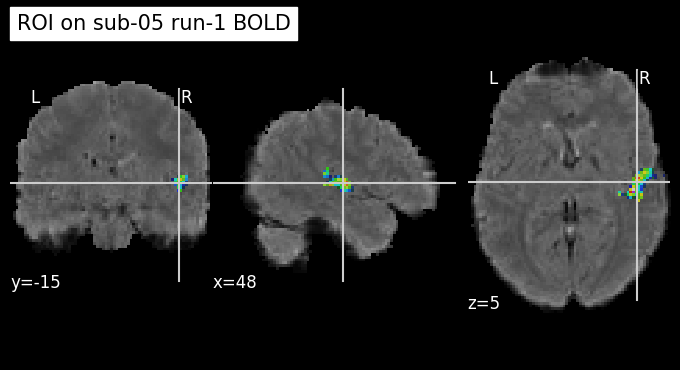

In [25]:
from nilearn import plotting
from nilearn.image import index_img

# 將 4D 影像抽成 3D：只取第 0 個 timepoint
bg_img_3d = index_img("raw_data/ds004078/derivatives/preprocessed_data/sub-05/MNI/sub-05_task-rest_run-1_bold.nii.gz", 0)

# 畫 ROI 疊圖
plotting.plot_roi("output/roi_masks/group_roi_1.nii.gz", bg_img=bg_img_3d, title="ROI on sub-05 run-1 BOLD")

In [27]:
from nilearn.input_data import NiftiMasker
from nilearn.image import load_img, math_img

# 讀取並 binarize ROI
roi_path = "output/roi_masks/group_roi_1.nii.gz"
roi_img = load_img(roi_path)
roi_bin = math_img("img > 0", img=roi_img)  # 這步非常重要！

# 讀取 BOLD 並提取 time series（未標準化）
bold_path = "raw_data/ds004078/derivatives/preprocessed_data/sub-05/MNI/sub-05_task-rest_run-1_bold.nii.gz"
masker = NiftiMasker(mask_img=roi_bin, standardize=False)
ts = masker.fit_transform(bold_path)

# 計算時間序列平均後的標準差
print("原始 ROI ts 標準差：", ts.mean(axis=1).std())

原始 ROI ts 標準差： 25.48992


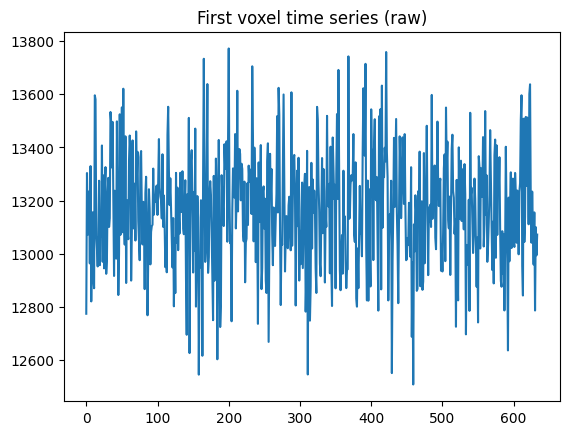

In [28]:
import matplotlib.pyplot as plt
plt.plot(ts[:, 0])  # 看第一個 voxel
plt.title("First voxel time series (raw)")
plt.show()

In [16]:
### 因為 sub-05 在 run 1 (roi 1 & roi 2) 的 time sires 標準差過低，所以需要排除 run 1 資料重新合併計算 roi_ts_clean

In [17]:
from nilearn.image import concat_imgs, load_img
from nilearn.input_data import NiftiMasker
from nilearn.image import math_img
import numpy as np
import os

subject = "sub-05"
bold_dir = f"raw_data/ds004078/derivatives/preprocessed_data/{subject}/MNI/"
save_dir = f"output/roi_ts"

# 定義要處理的 ROI 路徑
roi_paths = {
    "ROI1": "output/roi_masks/group_roi_1.nii.gz",
    "ROI2": "output/roi_masks/group_roi_2.nii.gz"
}

# 每個 ROI 要排除 run 1
bad_runs = {
    "ROI1": [1],
    "ROI2": [1]
}

# 處理每個 ROI
for roi_label, roi_path in roi_paths.items():
    roi_img = load_img(roi_path)
    roi_bin = math_img("img > 0", img=roi_img)

    # 收集要合併的 BOLD run
    imgs_to_merge = []
    for run in range(1, 5):
        if run in bad_runs[roi_label]:
            continue  # 跳過低品質 run

        bold_path = os.path.join(bold_dir, f"{subject}_task-rest_run-{run}_bold.nii.gz")
        if os.path.exists(bold_path):
            imgs_to_merge.append(load_img(bold_path))
        else:
            print(f"⚠️ 缺失檔案：{bold_path}")

    # 合併影像並提取時間序列
    if imgs_to_merge:
        concat_bold = concat_imgs(imgs_to_merge)
        masker = NiftiMasker(mask_img=roi_bin, standardize=True)
        ts = masker.fit_transform(concat_bold).mean(axis=1)

        # 儲存 CSV 與 NPY
        npy_path = os.path.join(save_dir, f"{subject}_{roi_label}_ts_clean.npy")
        csv_path = os.path.join(save_dir, f"{subject}_{roi_label}_ts_clean.csv")
        np.save(npy_path, ts)
        np.savetxt(csv_path, ts, delimiter=",")

        print(f"✅ 重新儲存 {roi_label} time series（排除 run 1）：")
        print(f"    CSV → {csv_path}")
        print(f"    NPY → {npy_path}")
    else:
        print(f"⚠️ 無法提取 {roi_label}，因為無可用 run。")

✅ 重新儲存 ROI1 time series（排除 run 1）：
    CSV → output/roi_ts/sub-05_ROI1_ts_clean.csv
    NPY → output/roi_ts/sub-05_ROI1_ts_clean.npy
✅ 重新儲存 ROI2 time series（排除 run 1）：
    CSV → output/roi_ts/sub-05_ROI2_ts_clean.csv
    NPY → output/roi_ts/sub-05_ROI2_ts_clean.npy


In [22]:
### 重新計算 run 2+3+4 的 rest image concat
from nilearn.image import concat_imgs, load_img
import os

# ---------- 參數設定 ----------
subject = "sub-05"
runs_to_use = [2, 3, 4]
bold_dir = f"raw_data/ds004078/derivatives/preprocessed_data/{subject}/MNI/"
save_path = f"output/roi_ts/rest/{subject}_task-rest_concat_clean.nii.gz"
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# ---------- 合併影像 ----------
bold_imgs = []
for run in runs_to_use:
    bold_path = os.path.join(bold_dir, f"{subject}_task-rest_run-{run}_bold.nii.gz")
    if os.path.exists(bold_path):
        bold_imgs.append(load_img(bold_path))
    else:
        print(f"⚠️ 找不到檔案：{bold_path}")

if bold_imgs:
    concat_img = concat_imgs(bold_imgs)
    concat_img.to_filename(save_path)
    print(f"✅ 已儲存合併影像至：{save_path}")
else:
    print("❌ 無可用影像可合併。")

✅ 已儲存合併影像至：output/roi_ts/rest/sub-05_task-rest_concat_clean.nii.gz


### sub-05 Reconcatenated Time Series Visualization (Excluding Run 1)

ROI 圖已儲存：output/roi_ts_zscore_nan/sub-05_roi_clean_ts_plot.png


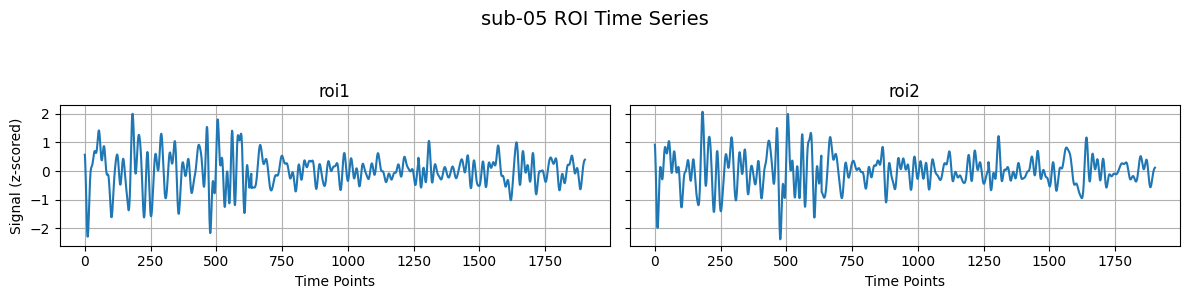

RSN 圖已儲存：output/rsn_ts_zscore/sub-05_rsn_clean_ts_plot.png


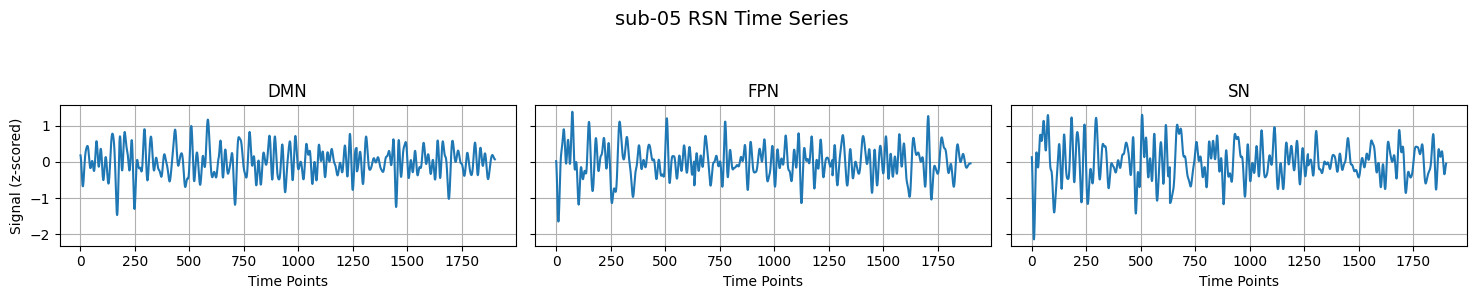

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === 設定 ===
subject = "sub-05"
roi_ts_dir = "output/roi_ts_zscore_nan"
rsn_ts_dir = "output/rsn_ts_zscore"
roi_labels = ["roi1", "roi2"]
rsn_labels = ["DMN", "FPN", "SN"]

# === 繪製 ROI 圖 ===
fig_roi, axes_roi = plt.subplots(1, len(roi_labels), figsize=(12, 3), sharey=True)
fig_roi.suptitle(f"{subject} ROI Time Series", fontsize=14)

for i, roi in enumerate(roi_labels):
    filename = f"{subject}_{roi}_zscore_clean_ts.csv"
    path = os.path.join(roi_ts_dir, filename)
    if os.path.exists(path):
        ts = pd.read_csv(path).values.squeeze()
        axes_roi[i].plot(ts)
        axes_roi[i].set_title(f"{roi}")
        axes_roi[i].set_xlabel("Time Points")
        if i == 0:
            axes_roi[i].set_ylabel("Signal (z-scored)")
        axes_roi[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.9])
roi_fig_path = os.path.join(roi_ts_dir, f"{subject}_roi_clean_ts_plot.png")
plt.savefig(roi_fig_path)
print(f"ROI 圖已儲存：{roi_fig_path}")
plt.show()

# === 繪製 RSN 圖 ===
fig_rsn, axes_rsn = plt.subplots(1, len(rsn_labels), figsize=(15, 3), sharey=True)
fig_rsn.suptitle(f"{subject} RSN Time Series", fontsize=14)

for i, rsn in enumerate(rsn_labels):
    filename = f"{subject}_{rsn}_zscore_clean_ts.csv"
    path = os.path.join(rsn_ts_dir, filename)
    if os.path.exists(path):
        ts = pd.read_csv(path).values.squeeze()
        axes_rsn[i].plot(ts)
        axes_rsn[i].set_title(f"{rsn}")
        axes_rsn[i].set_xlabel("Time Points")
        if i == 0:
            axes_rsn[i].set_ylabel("Signal (z-scored)")
        axes_rsn[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.9])
rsn_fig_path = os.path.join(rsn_ts_dir, f"{subject}_rsn_clean_ts_plot.png")
plt.savefig(rsn_fig_path)
print(f"RSN 圖已儲存：{rsn_fig_path}")
plt.show()